In [3]:
import pandas as pd
from tqdm import tqdm
import numpy as np
from numpy import mean
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

%matplotlib inline
plt.style.use('ggplot')

In [4]:
#source: https://www.gov.uk/guidance/about-the-price-paid-data#explanations-of-column-headers-in-the-ppd

header_list = ['transaction_id', 'price', 'date', 'postcode', 'property_type', 'new_build', 'lease_duration',
              'house_name_num', 'secondary_name', 'street', 'locality', 'town_city', 'district', 'county',
              'price_paid_category', 'record_status']

# Loading Dataset:

- Source: https://www.gov.uk/government/statistical-data-sets/price-paid-data-downloads

In [5]:
house_purchases = pd.read_csv('Data/pp_complete.csv', names = header_list)

In [6]:
house_purchases.head()

,transaction_id,price,date,postcode,property_type,new_build,lease_duration,house_name_num,secondary_name,street,locality,town_city,district,county,price_paid_category,record_status
0,{A42E2F04-2538-4A25-94C5-49E29C6C8FA8},18500,1995-01-31 00:00,TQ1 1RY,F,N,L,VILLA PARADISO,FLAT 10,HIGHER WARBERRY ROAD,TORQUAY,TORQUAY,TORBAY,TORBAY,A,A
1,{1BA349E3-2579-40D6-999E-49E2A25D2284},73450,1995-10-09 00:00,L26 7XJ,D,Y,F,6,NaN,CATKIN ROAD,LIVERPOOL,LIVERPOOL,KNOWSLEY,MERSEYSIDE,A,A
2,{E5B50DCB-BC7A-4E54-B167-49E2A6B4148B},59000,1995-03-31 00:00,BH12 2AE,D,N,F,28,NaN,ALDER ROAD,POOLE,POOLE,POOLE,POOLE,A,A
3,{81E50116-D675-4B7F-9F8D-49E2B5D43271},31000,1995-12-04 00:00,IP13 0DR,D,Y,F,NONSUCH COTTAGE,NaN,THE STREET,HACHESTON,WOODBRIDGE,SUFFOLK COASTAL,SUFFOLK,A,A
4,{B97455B9-75CB-40BB-A615-42C53683E143},95000,1995-09-22 00:00,WS14 0BE,D,N,F,FOX COVER COTTAGE,NaN,HALL LANE,LICHFIELD,LICHFIELD,LICHFIELD,STAFFORDSHIRE,A,A


In [7]:
house_purchases.shape

(25467513, 16)

- Converting date to datetime format:

In [6]:
house_purchases['date'] = pd.to_datetime(house_purchases['date'])

In [60]:
house_purchases.dtypes

transaction_id                 object
price                           int64
date                   datetime64[ns]
postcode                       object
property_type                  object
new_build                      object
lease_duration                 object
house_name_num                 object
secondary_name                 object
street                         object
locality                       object
town_city                      object
district                       object
county                         object
price_paid_category            object
record_status                  object
yr_month                       object
yr_week                        object
dtype: object

# Plotting Time Series Graph:

In [21]:
house_purchases['yr_month'] = house_purchases['date'].dt.strftime('%Y-%m')

In [65]:
house_purchases['yr_week'] = house_purchases['date'].dt.strftime('%Y-%W')

In [66]:
house_purchases.head(3)

,transaction_id,price,date,postcode,property_type,new_build,lease_duration,house_name_num,secondary_name,street,locality,town_city,district,county,price_paid_category,record_status,yr_month,yr_week
0,{A42E2F04-2538-4A25-94C5-49E29C6C8FA8},18500,1995-01-31,TQ1 1RY,F,N,L,VILLA PARADISO,FLAT 10,HIGHER WARBERRY ROAD,TORQUAY,TORQUAY,TORBAY,TORBAY,A,A,1995-01-05,1995-05
1,{1BA349E3-2579-40D6-999E-49E2A25D2284},73450,1995-10-09,L26 7XJ,D,Y,F,6,NaN,CATKIN ROAD,LIVERPOOL,LIVERPOOL,KNOWSLEY,MERSEYSIDE,A,A,1995-10-41,1995-41
2,{E5B50DCB-BC7A-4E54-B167-49E2A6B4148B},59000,1995-03-31,BH12 2AE,D,N,F,28,NaN,ALDER ROAD,POOLE,POOLE,POOLE,POOLE,A,A,1995-03-13,1995-13


In [81]:
time_and_price = house_purchases[['price', 'date']]

In [83]:
time_and_price= time_and_price.sort_values(by='date')
time_and_price.head()

,price,date
502022,84000,1995-01-01
381952,17000,1995-01-01
309959,125000,1995-01-01
397700,11500,1995-01-01
67734,50000,1995-01-01


In [82]:
time_and_price.dtypes

price             int64
date     datetime64[ns]
dtype: object

In [84]:
# creating a column to count the number of sales during the time period
time_and_price['n_sales'] = 1

In [85]:
price_mean = time_and_price.groupby('date')["price"].mean().reset_index(name = 'av_price')
n_count = time_and_price.groupby('date')["n_sales"].sum().reset_index(name = 'daily_sales')

In [1]:
n_count.head(3)

NameError: name 'n_count' is not defined

In [87]:
price_mean.head(3)

,date,av_price
0,1995-01-01,63685.446429
1,1995-01-02,76743.308824
2,1995-01-03,65012.750480


In [88]:
time_series = pd.merge(price_mean, n_count, how='left', on='date')

In [89]:
time_series.head()

,date,av_price,daily_sales
0,1995-01-01,63685.446429,56
1,1995-01-02,76743.308824,68
2,1995-01-03,65012.750480,1042
3,1995-01-04,77713.120719,1168
4,1995-01-05,78786.458088,1360


In [90]:
time_series.dtypes

date           datetime64[ns]
av_price              float64
daily_sales             int64
dtype: object

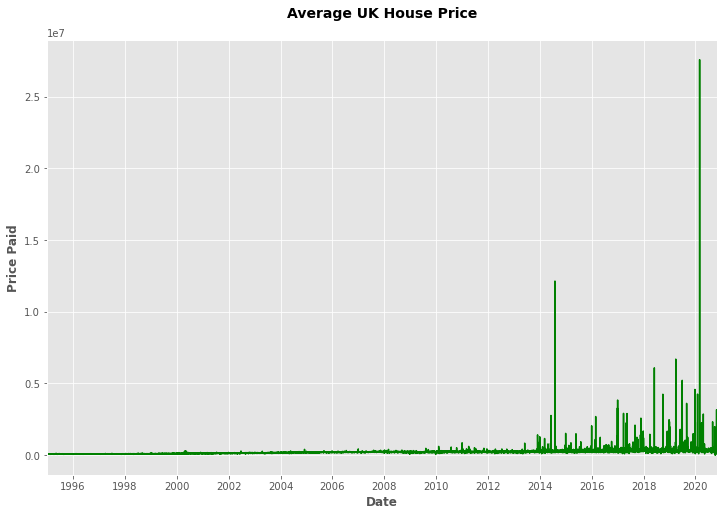

In [91]:
fig, ax = plt.subplots(figsize=(12, 8))
dat = time_series.date

ax = sns.lineplot(data=time_series, x="date", y="av_price", color= 'green')

plt.xlim(min(dat), max(dat))

date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.YearLocator(2))

plt.title('Average UK House Price\n', fontsize = 14, fontweight = 'bold')
plt.ylabel('Price Paid', fontsize = 12, fontweight = 'bold')
plt.xlabel('Date', fontsize = 12, fontweight = 'bold')
plt.show()

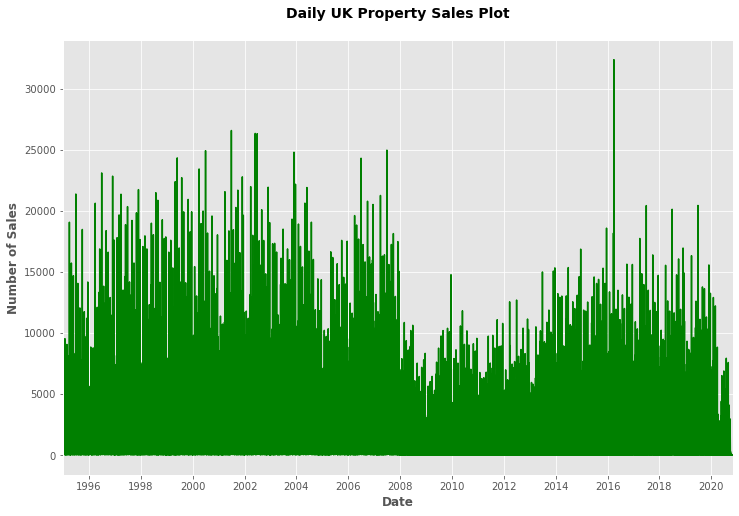

In [94]:
fig, ax = plt.subplots(figsize=(12, 8))
dat = time_series.date

ax = sns.lineplot(data=time_series, x="date", y="daily_sales", color= 'green')

plt.xlim(min(dat), max(dat))

date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.YearLocator(2))

plt.title('Daily UK Property Sales Plot\n', fontsize = 14, fontweight = 'bold')
plt.ylabel('Number of Sales', fontsize = 12, fontweight = 'bold')
plt.xlabel('Date', fontsize = 12, fontweight = 'bold')
plt.show()

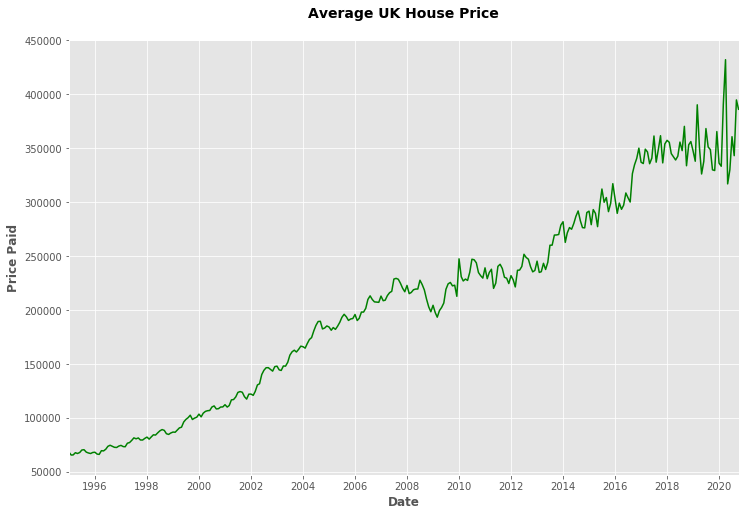

In [168]:
fig, ax = plt.subplots(figsize=(12, 8))
dat = time_series.yr_month

ax = sns.lineplot(data=time_series, x="yr_month", y="av_price", color= 'green')

plt.xlim(min(dat), max(dat))

date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.YearLocator(2))

plt.title('Average UK House Price\n', fontsize = 14, fontweight = 'bold')
plt.ylabel('Price Paid', fontsize = 12, fontweight = 'bold')
plt.xlabel('Date', fontsize = 12, fontweight = 'bold')
plt.show()

## Converting to Real House Prices to aid comparability between years:

In [66]:
time_series.head(3)

,yr_month,av_price
0,1995-01,68373.188686
1,1995-02,65648.586302
2,1995-03,65745.838272


## Loading RPI Data:

In [82]:
rpi = pd.read_csv('Data/RPI_all_items.csv')

In [83]:
rpi.head()

,date,year,month_no,og_base,oct_20_rebase
0,1995 JAN,1995,1,146.0,2.015753
1,1995 FEB,1995,2,146.9,2.003404
2,1995 MAR,1995,3,147.5,1.995254
3,1995 APR,1995,4,149.0,1.975168
4,1995 MAY,1995,5,149.6,1.967246


- Since both dataframes are sorted and the same length I can just move the RPI rebased column onto the time series df:

In [169]:
time_series['rebase'] = rpi['oct_20_rebase']

- Calculating real prices using the RPI index:

In [170]:
time_series['real_price'] = time_series['av_price']*time_series['rebase']

In [171]:
time_series.head()

,yr_month,av_price,rebase,real_price
0,1995-01-01,68373.188686,2.015753,137823.489273
1,1995-02-01,65648.586302,2.003404,131520.619121
2,1995-03-01,65745.838272,1.995254,131179.662377
3,1995-04-01,67806.979361,1.975168,133930.161231
4,1995-05-01,67067.702599,1.967246,131938.668930


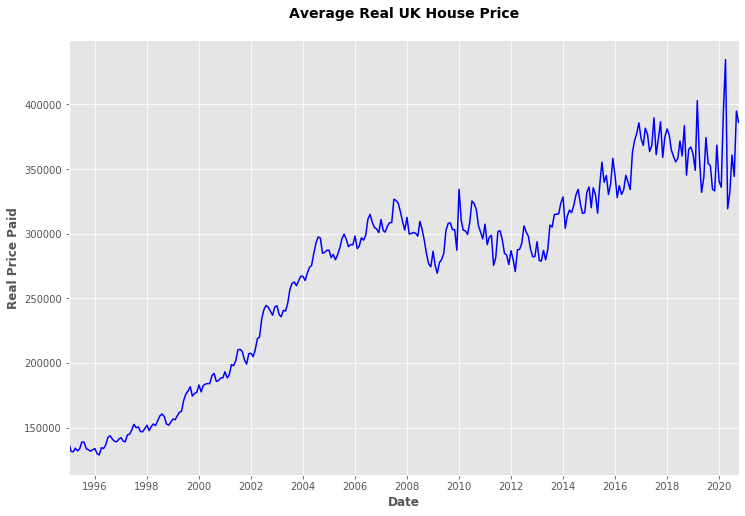

In [179]:
fig, ax = plt.subplots(figsize=(12, 8))
dat = time_series.yr_month

ax = sns.lineplot(data=time_series, x="yr_month", y="real_price", color= 'blue')

plt.xlim(min(dat), max(dat))

date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.YearLocator(2))

plt.title('Average Real UK House Price\n', fontsize = 14, fontweight = 'bold')
plt.ylabel('Real Price Paid', fontsize = 12, fontweight = 'bold')
plt.xlabel('Date', fontsize = 12, fontweight = 'bold')
plt.show()

## Plotting Real and Normal Prices on Same Graph:

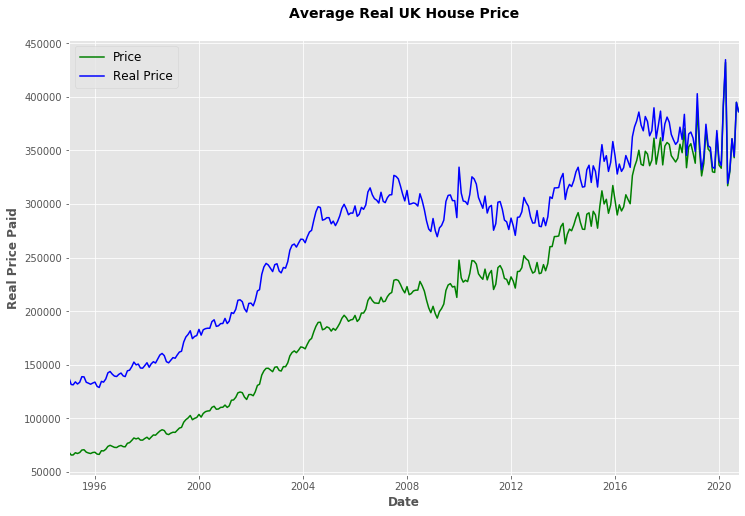

In [201]:
fig, ax = plt.subplots(figsize=(12, 8))
dat = time_series.yr_month

sns.lineplot(data=time_series, x="yr_month", y="av_price", color= 'green', label = "Price")
sns.lineplot(data=time_series, x="yr_month", y="real_price", color= 'blue', label = "Real Price")

plt.xlim(min(dat), max(dat))

date_form = DateFormatter("%Y")
#ax[0].xaxis.set_major_formatter(date_form)
#ax[0].xaxis.set_major_locator(mdates.YearLocator(2))

plt.title('Average Real UK House Price\n', fontsize = 14, fontweight = 'bold')
plt.ylabel('Real Price Paid', fontsize = 12, fontweight = 'bold')
plt.xlabel('Date', fontsize = 12, fontweight = 'bold')
plt.legend(fontsize = 'large')
plt.show()

## Calculating % Change:

In [204]:
time_series['annual_perc_change'] = time_series.real_price.pct_change(periods=12)

In [368]:
time_series['nom_perc_change'] = time_series.av_price.pct_change(periods=12)

In [369]:
time_series[12:14]

,yr_month,av_price,rebase,real_price,annual_perc_change,nom_perc_change
12,1996-01-01,68244.547513,1.959387,133717.512179,-0.029792,-0.001881
13,1996-02-01,66505.303467,1.950298,129705.174373,-0.013803,0.013050


In [375]:
# Dropping the first year where there is no annual comparison
real_perc_change_ts = time_series[12:]

In [503]:
time_series.yr_month[210:220]

210   2012-07-01
211   2012-08-01
212   2012-09-01
213   2012-10-01
214   2012-11-01
215   2012-12-01
216   2013-01-01
217   2013-02-01
218   2013-03-01
219   2013-04-01
Name: yr_month, dtype: datetime64[ns]

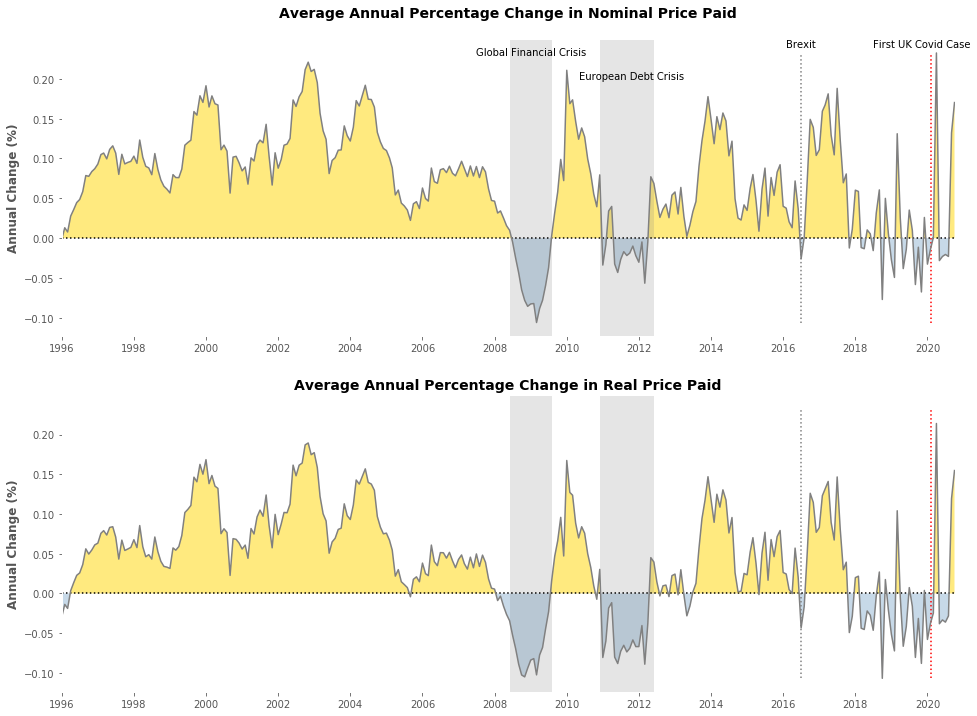

In [534]:
plt.rcParams['axes.facecolor'] = 'white'
fig, axs = plt.subplots(2, 1, figsize=(16, 12))
dat = real_perc_change_ts.yr_month

y_diffs_nom = real_perc_change_ts.nom_perc_change
y_diffs_real = real_perc_change_ts.annual_perc_change

sns.lineplot(data=real_perc_change_ts, x="yr_month", y="nom_perc_change", color= 'grey', ax=axs[0])
sns.lineplot(data=real_perc_change_ts, x="yr_month", y="annual_perc_change", color= 'grey', ax=axs[1])

# Filling between x axis and plots:
axs[0].fill_between(dat, y_diffs, 0, where=y_diffs_nom >= 0, facecolor='gold', interpolate=True, alpha=0.5)
axs[0].fill_between(dat, y_diffs, 0, where=y_diffs_nom <= 0, facecolor='steelblue', interpolate=True, alpha=0.3)
axs[1].fill_between(dat, y_diffs_real, 0, where=y_diffs_real >= 0, facecolor='gold', interpolate=True, alpha=0.5)
axs[1].fill_between(dat, y_diffs_real, 0, where=y_diffs_real <= 0, facecolor='steelblue', interpolate=True, alpha=0.3)

# Annotating text and grey vertical bars:
a = time_series.yr_month[161:162]
b = time_series.yr_month[175:176]
c = time_series.yr_month[191:192]
d = time_series.yr_month[209:210]
e = time_series.yr_month[301:302]
f = time_series.yr_month[309:310]

axs[0].axvspan(a, b, color='grey', alpha=0.2, lw=0)
axs[0].text(time_series.yr_month[150:151], 0.23, "Global Financial Crisis")
axs[0].axvspan(c, d, color='grey', alpha=0.2, lw=0)
axs[0].text(time_series.yr_month[184:185], 0.2, "European Debt Crisis")
axs[1].axvspan(a, b, color='grey', alpha=0.2, lw=0)
axs[1].axvspan(c, d, color='grey', alpha=0.2, lw=0)

# Plotting vertical dashed lines
axs[0].vlines(time_series.yr_month[301:302], min(y_diffs_nom), max(y_diffs_nom), linestyle="dotted", color = 'red')
axs[0].text(time_series.yr_month[282:283], 0.24, "First UK Covid Case")
axs[0].vlines(time_series.yr_month[258:259], min(y_diffs_nom), max(y_diffs_nom), linestyle="dotted", color = 'grey')
axs[0].text(time_series.yr_month[253:254], 0.24, "Brexit")
axs[1].vlines(time_series.yr_month[301:302], min(y_diffs_nom), max(y_diffs_nom), linestyle="dotted", color = 'red')
axs[1].vlines(time_series.yr_month[258:259], min(y_diffs_nom), max(y_diffs_nom), linestyle="dotted", color = 'grey')

# Setting the limits and ticks of the x axis:
axs[0].set_xlim(min(dat), max(dat))
axs[1].set_xlim(min(dat), max(dat))

date_form = DateFormatter("%Y")
axs[0].xaxis.set_major_formatter(date_form)
axs[0].xaxis.set_major_locator(mdates.YearLocator(2))
axs[1].xaxis.set_major_formatter(date_form)
axs[1].xaxis.set_major_locator(mdates.YearLocator(2))

# Plotting horizontal dashed lines
axs[0].hlines(0, min(dat), max(dat), linestyle="dotted", color = 'black')
axs[1].hlines(0, min(dat), max(dat), linestyle="dotted", color = 'black')

axs[0].set_title('Average Annual Percentage Change in Nominal Price Paid\n', fontsize = 14, fontweight = 'bold')
axs[1].set_title('Average Annual Percentage Change in Real Price Paid', fontsize = 14, fontweight = 'bold')

axs[0].set_ylabel('Annual Change (%)', fontsize = 12, fontweight = 'bold')
axs[0].set_xlabel('')
axs[1].set_ylabel('Annual Change (%)', fontsize = 12, fontweight = 'bold')
axs[1].set_xlabel('')

plt.show()

## Looking to see if smoothing makes the trend more clear:

In [251]:
rolling = real_perc_change_ts.annual_perc_change.rolling(window=3)

In [252]:
rolling_mean = rolling.mean()

In [253]:
real_perc_change_ts['roll_per_change'] = rolling_mean

C:\Users\rozhouse\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [254]:
rolling_real_perc_chg = real_perc_change_ts[5:]

In [255]:
rolling_real_perc_chg.head()

,yr_month,av_price,rebase,real_price,annual_perc_change,roll_per_change
17,1996-06-01,71016.560039,1.923529,136602.441973,0.022801,0.013219
18,1996-07-01,73710.273361,1.931102,142342.082992,0.025799,0.020658
19,1996-08-01,74713.062308,1.922273,143618.904214,0.036290,0.028297
20,1996-09-01,73726.581636,1.913524,141077.587600,0.056130,0.039406
21,1996-10-01,72811.880387,1.913524,139327.284755,0.049555,0.047325


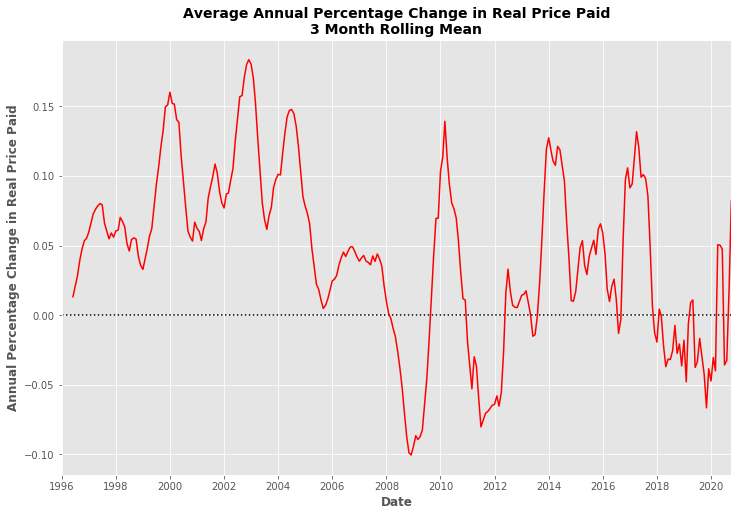

In [257]:
fig, ax = plt.subplots(figsize=(12, 8))
dat = real_perc_change_ts.yr_month

ax = sns.lineplot(data=rolling_real_perc_chg, x="yr_month", y="roll_per_change", color= 'red')

plt.xlim(min(dat), max(dat))

date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.YearLocator(2))
plt.hlines(0, min(dat), max(dat), linestyle="dotted", color = 'black')

plt.title('Average Annual Percentage Change in Real Price Paid\n3 Month Rolling Mean', fontsize = 14, fontweight = 'bold')
plt.ylabel('Annual Percentage Change in Real Price Paid', fontsize = 12, fontweight = 'bold')
plt.xlabel('Date', fontsize = 12, fontweight = 'bold')
plt.show()

## Looking at just the most recent years:

In [242]:
last_five = time_series[252:]

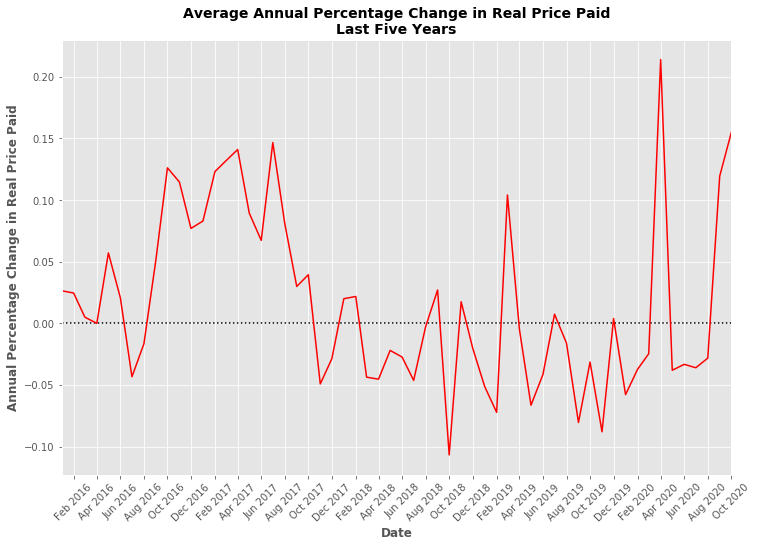

In [310]:
fig, ax = plt.subplots(figsize=(12, 8))
dat = last_five.yr_month

ax = sns.lineplot(data=last_five, x="yr_month", y="annual_perc_change", color= 'red')

plt.xlim(min(dat), max(dat))

date_form = DateFormatter("%b %Y")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 2))
plt.hlines(0, min(dat), max(dat), linestyle="dotted", color = 'black')

plt.xticks(rotation = 45)
plt.title('Average Annual Percentage Change in Real Price Paid\nLast Five Years', fontsize = 14, fontweight = 'bold')
plt.ylabel('Annual Percentage Change in Real Price Paid', fontsize = 12, fontweight = 'bold')
plt.xlabel('Date', fontsize = 12, fontweight = 'bold')
plt.show()

# Comparing London Only:

In [283]:
lon_hp = house_purchases[house_purchases['county']== 'GREATER LONDON']

In [284]:
lon_hp.head()

,transaction_id,price,date,postcode,property_type,new_build,lease_duration,house_name_num,secondary_name,street,locality,town_city,district,county,price_paid_category,record_status,yr_month
15,{A4315312-90D5-42D1-85F6-3F3209E9C709},59995,1995-10-19,SM6 7AG,F,Y,L,55,NaN,CARAWAY PLACE,WALLINGTON,WALLINGTON,SUTTON,GREATER LONDON,A,A,1995-10-01
36,{CEA5DDF7-F936-4DB1-934B-42C5CBF28AD8},292500,1995-08-31,HA3 6DD,D,Y,F,11,NaN,LAVENDER GARDENS,HARROW WEALD,HARROW,HARROW,GREATER LONDON,A,A,1995-08-01
43,{613A5A52-B86D-4F69-B56D-49E35D0A3C64},84000,1995-07-28,RM5 3YL,T,N,F,40,NaN,MOUNT PLEASANT ROAD,ROMFORD,ROMFORD,HAVERING,GREATER LONDON,A,A,1995-07-01
47,{7624595C-53BF-4AC8-9683-42C5F7CFA5C6},66500,1995-07-12,SE6 4EW,T,N,F,6,NaN,BROXTED ROAD,LONDON,LONDON,LEWISHAM,GREATER LONDON,A,A,1995-07-01
62,{A5053A3C-81C1-4CD1-8DEF-49E3C462498A},67995,1995-09-20,N22 6NP,T,N,F,155,NaN,MORLEY AVENUE,LONDON,LONDON,HARINGEY,GREATER LONDON,A,A,1995-09-01


In [285]:
lon_time_and_price = lon_hp[['price', 'yr_month']]
lon_time_and_price= lon_time_and_price.sort_values(by='yr_month')
lon_time_series = lon_time_and_price.groupby('yr_month')["price"].mean().reset_index(name = 'av_price')

In [286]:
lon_time_series.head()

,yr_month,av_price
0,1995-01-01,100509.602586
1,1995-02-01,94437.518132
2,1995-03-01,94772.751629
3,1995-04-01,97215.702944
4,1995-05-01,95695.332171


In [287]:
lon_time_series['rebase'] = rpi['oct_20_rebase']
lon_time_series['real_price'] = lon_time_series['av_price']*lon_time_series['rebase']
lon_time_series['annual_perc_change'] = lon_time_series.real_price.pct_change(periods=12)

In [370]:
lon_time_series['nom_perc_change'] = lon_time_series.av_price.pct_change(periods=12)

In [371]:
lon_time_series[12:15]

,yr_month,av_price,rebase,real_price,annual_perc_change,nom_perc_change
12,1996-01-01,100978.677481,1.959387,197856.356706,-0.023426,0.004667
13,1996-02-01,97141.210063,1.950298,189454.328201,0.001363,0.028629
14,1996-03-01,96616.646428,1.942574,187685.010149,-0.007460,0.019456


In [290]:
london_ts = lon_time_series[12:]

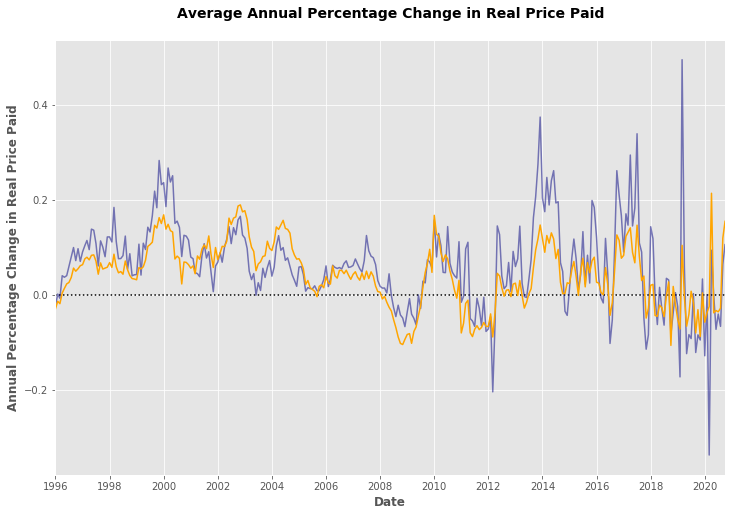

In [301]:
fig, ax = plt.subplots(figsize=(12, 8))
dat = real_perc_change_ts.yr_month

ax = sns.lineplot(data=london_ts, x="yr_month", y="annual_perc_change", color= 'navy', alpha = 0.5)
sns.lineplot(data=real_perc_change_ts, x="yr_month", y="annual_perc_change", color= 'orange')

plt.xlim(min(dat), max(dat))

date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.YearLocator(2))
plt.hlines(0, min(dat), max(dat), linestyle="dotted", color = 'black')

plt.title('Average Annual Percentage Change in Real Price Paid\n', fontsize = 14, fontweight = 'bold')
plt.ylabel('Annual Percentage Change in Real Price Paid', fontsize = 12, fontweight = 'bold')
plt.xlabel('Date', fontsize = 12, fontweight = 'bold')
plt.show()

In [351]:
lon_last_five = lon_time_series[252:]

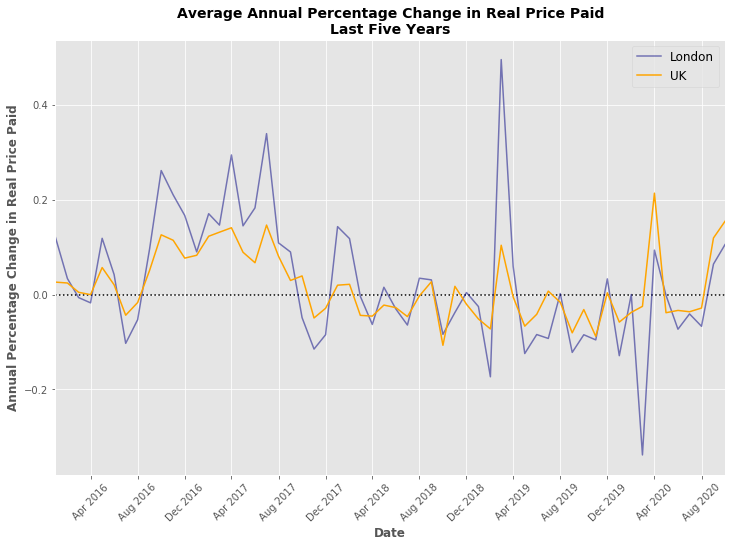

In [366]:
fig, ax = plt.subplots(figsize=(12, 8))
dat = last_five.yr_month

ax = sns.lineplot(data=lon_last_five, x="yr_month", y="annual_perc_change", color= 'navy', alpha =0.5, label = 'London')
sns.lineplot(data=last_five, x="yr_month", y="annual_perc_change", color= 'orange', label = 'UK')

plt.xlim(min(dat), max(dat))

date_form = DateFormatter("%b %Y")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 4))
plt.hlines(0, min(dat), max(dat), linestyle="dotted", color = 'black')

plt.xticks(rotation = 45)
plt.title('Average Annual Percentage Change in Real Price Paid\nLast Five Years', fontsize = 14, fontweight = 'bold')
plt.ylabel('Annual Percentage Change in Real Price Paid', fontsize = 12, fontweight = 'bold')
plt.xlabel('Date', fontsize = 12, fontweight = 'bold')
plt.legend(fontsize = 'large')
plt.show()

# Counties Selected Surrounding London:

In [342]:
# This list is from my other notebook using the condensed df that I use for the rest of my project
# The list below excludes Greater London:
counties_lst = ['SURREY', 'NORTHAMPTONSHIRE', 'MILTON KEYNES',
       'CAMBRIDGESHIRE', 'KENT', 'SOUTHEND-ON-SEA', 'HERTFORDSHIRE',
       'WEST SUSSEX', 'BRIGHTON AND HOVE', 'MEDWAY', 'BEDFORD',
       'OXFORDSHIRE', 'BUCKINGHAMSHIRE', 'READING',
       'WINDSOR AND MAIDENHEAD', 'ESSEX', 'THURROCK', 'SLOUGH',
       'BRACKNELL FOREST', 'HAMPSHIRE', 'CENTRAL BEDFORDSHIRE',
       'WEST BERKSHIRE', 'EAST SUSSEX', 'WOKINGHAM', 'SUFFOLK', 'LUTON']

In [343]:
mask = house_purchases['county'].isin(counties_lst)
surr_counties_data = house_purchases[mask]

In [344]:
sc_time_and_price = surr_counties_data[['price', 'yr_month']]
sc_time_and_price= sc_time_and_price.sort_values(by='yr_month')
sc_time_series = sc_time_and_price.groupby('yr_month')["price"].mean().reset_index(name = 'av_price')

In [345]:
sc_time_series['rebase'] = rpi['oct_20_rebase']
sc_time_series['real_price'] = sc_time_series['av_price']*sc_time_series['rebase']
sc_time_series['annual_perc_change'] = sc_time_series.real_price.pct_change(periods=12)

In [372]:
sc_time_series['nom_perc_change'] = sc_time_series.av_price.pct_change(periods=12)

In [373]:
sc_time_series[12:15]

,yr_month,av_price,rebase,real_price,annual_perc_change,nom_perc_change
12,1996-01-01,79020.914944,1.959387,154832.591637,-0.016183,0.012119
13,1996-02-01,75906.787492,1.950298,148040.871849,-0.022926,0.003679
14,1996-03-01,75873.576119,1.942574,147390.055756,-0.024530,0.001923


In [374]:
sc_ts = sc_time_series[12:]

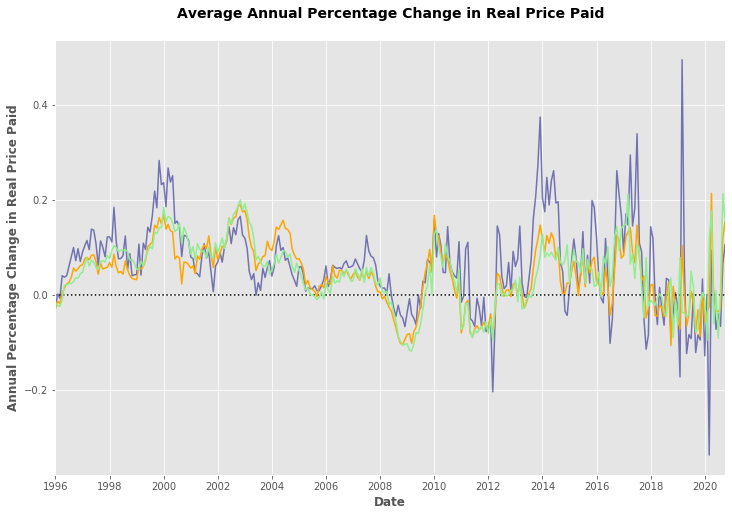

In [348]:
fig, ax = plt.subplots(figsize=(12, 8))
dat = real_perc_change_ts.yr_month

ax = sns.lineplot(data=london_ts, x="yr_month", y="annual_perc_change", color= 'navy', alpha = 0.5)
sns.lineplot(data=real_perc_change_ts, x="yr_month", y="annual_perc_change", color= 'orange')
sns.lineplot(data=sc_ts, x="yr_month", y="annual_perc_change", color= 'lightgreen')

plt.xlim(min(dat), max(dat))

date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.YearLocator(2))
plt.hlines(0, min(dat), max(dat), linestyle="dotted", color = 'black')

plt.title('Average Annual Percentage Change in Real Price Paid\n', fontsize = 14, fontweight = 'bold')
plt.ylabel('Annual Percentage Change in Real Price Paid', fontsize = 12, fontweight = 'bold')
plt.xlabel('Date', fontsize = 12, fontweight = 'bold')
plt.show()

In [350]:
sc_last_five = sc_time_series[252:]

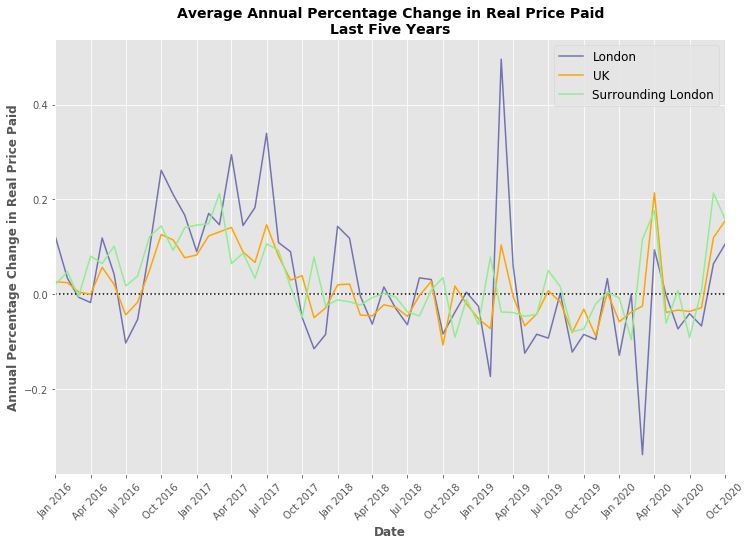

In [362]:
fig, ax = plt.subplots(figsize=(12, 8))
dat = last_five.yr_month

ax = sns.lineplot(data=lon_last_five, x="yr_month", y="annual_perc_change", color= 'navy', alpha =0.5, label = 'London')
sns.lineplot(data=last_five, x="yr_month", y="annual_perc_change", color= 'orange', label = 'UK')
sns.lineplot(data=sc_last_five, x="yr_month", y="annual_perc_change", color= 'lightgreen', label = 'Surrounding London')

plt.xlim(min(dat), max(dat))

date_form = DateFormatter("%b %Y")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 3))
plt.hlines(0, min(dat), max(dat), linestyle="dotted", color = 'black')

plt.xticks(rotation = 45)
plt.title('Average Annual Percentage Change in Real Price Paid\nLast Five Years', fontsize = 14, fontweight = 'bold')
plt.ylabel('Annual Percentage Change in Real Price Paid', fontsize = 12, fontweight = 'bold')
plt.xlabel('Date', fontsize = 12, fontweight = 'bold')
plt.legend(fontsize = 'large')
plt.show()

# Looking at just the last year:

In [353]:
last_year = time_series[298:]
lon_last_year = lon_time_series[298:]
sc_last_year = sc_time_series[298:]

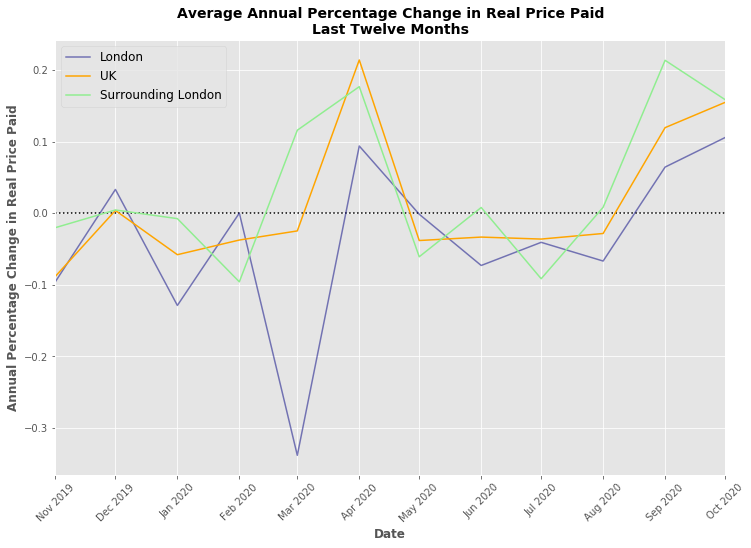

In [361]:
fig, ax = plt.subplots(figsize=(12, 8))
dat = last_year.yr_month

ax = sns.lineplot(data=lon_last_year, x="yr_month", y="annual_perc_change", color= 'navy', alpha =0.5, label = 'London')
sns.lineplot(data=last_year, x="yr_month", y="annual_perc_change", color= 'orange', label = 'UK')
sns.lineplot(data=sc_last_year, x="yr_month", y="annual_perc_change", color= 'lightgreen', label = 'Surrounding London')

plt.xlim(min(dat), max(dat))

date_form = DateFormatter("%b %Y")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 1))
plt.hlines(0, min(dat), max(dat), linestyle="dotted", color = 'black')

plt.xticks(rotation = 45)
plt.title('Average Annual Percentage Change in Real Price Paid\nLast Twelve Months', fontsize = 14, fontweight = 'bold')
plt.ylabel('Annual Percentage Change in Real Price Paid', fontsize = 12, fontweight = 'bold')
plt.xlabel('Date', fontsize = 12, fontweight = 'bold')
plt.legend(fontsize = 'large')
plt.grid('off')
plt.show()

## Including individual days data:

In [ ]:
rpi.rename({'month_no': 'month'}, axis=1, inplace=True)

In [549]:
sc_last_year_ts = surr_counties_data[['price', 'date']]
lon_last_year_ts = lon_hp[['price', 'date']]

In [588]:
def prep_time_series(df, i):
    df= df.sort_values(by='date')
    df = df.groupby('date')["price"].mean().reset_index(name = 'av_price')
    df['year'] = pd.DatetimeIndex(df['date']).year
    df['month'] = pd.DatetimeIndex(df['date']).month
    new_df = pd.merge(df, rpi, on=['year', 'month'], how='left')
    new_df['real_price'] = new_df['av_price']*new_df['oct_20_rebase']
    new_df['annual_perc_change'] = new_df.real_price.pct_change(periods=365)
    ts = new_df[i:]
    return ts

In [589]:
last_yr_sc_every_day = prep_time_series(sc_last_year_ts, 8651)

In [590]:
last_yr_lon_every_day = prep_time_series(lon_last_year_ts, 8651)

In [591]:
last_yr_sc_every_day.head()

,date_x,av_price,year,month,date_y,og_base,oct_20_rebase,real_price,annual_perc_change
8651,2018-12-12,429060.401176,2018,12,2018 DEC,285.6,1.030462,442130.518493,0.061407
8652,2018-12-13,434032.045556,2018,12,2018 DEC,285.6,1.030462,447253.610023,0.113033
8653,2018-12-14,381129.318719,2018,12,2018 DEC,285.6,1.030462,392739.350535,-0.457822
8654,2018-12-15,296543.750000,2018,12,2018 DEC,285.6,1.030462,305577.120573,-0.352161
8655,2018-12-16,221500.000000,2018,12,2018 DEC,285.6,1.030462,228247.373977,-0.467709


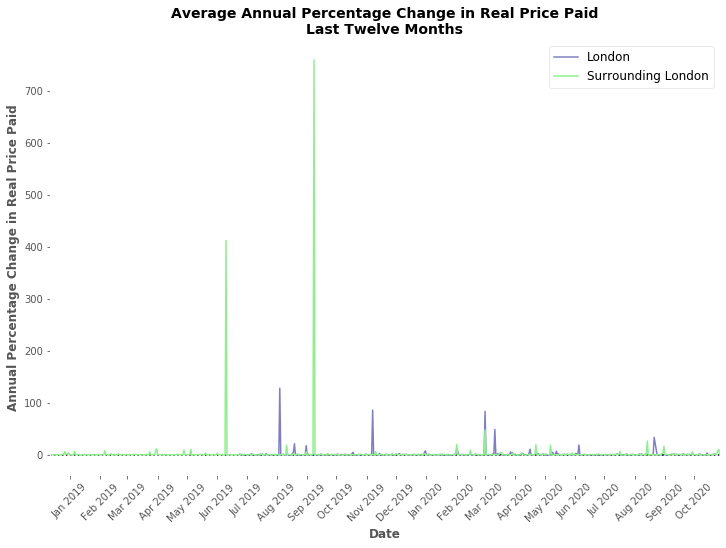

In [595]:
fig, ax = plt.subplots(figsize=(12, 8))
dat = last_yr_sc_every_day.date_x

ax = sns.lineplot(data=last_yr_lon_every_day, x="date_x", y="annual_perc_change", color= 'navy', alpha =0.5, label = 'London')
sns.lineplot(data=last_yr_sc_every_day, x="date_x", y="annual_perc_change", color= 'lightgreen', label = 'Surrounding London')

plt.xlim(min(dat), max(dat))

date_form = DateFormatter("%b %Y")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 1))
plt.hlines(0, min(dat), max(dat), linestyle="dotted", color = 'black')

plt.xticks(rotation = 45)
plt.title('Average Annual Percentage Change in Real Price Paid\nLast Twelve Months', fontsize = 14, fontweight = 'bold')
plt.ylabel('Annual Percentage Change in Real Price Paid', fontsize = 12, fontweight = 'bold')
plt.xlabel('Date', fontsize = 12, fontweight = 'bold')
plt.legend(fontsize = 'large')
plt.grid('off')
plt.show()

In [596]:
rolling = last_yr_sc_every_day.annual_perc_change.rolling(window=30)
rolling_mean = rolling.mean()
last_yr_sc_every_day['roll_per_change'] = rolling_mean
last_yr_sc_every_day_rolling = last_yr_sc_every_day[29:]

In [597]:
rolling_lon = last_yr_lon_every_day.annual_perc_change.rolling(window=30)
rolling_mean_lon = rolling_lon.mean()
last_yr_lon_every_day['roll_per_change'] = rolling_mean_lon
last_yr_lon_every_day_rolling = last_yr_lon_every_day[29:]

In [598]:
last_yr_sc_every_day_rolling['cum_sum'] = last_yr_sc_every_day_rolling['real_price'].cumsum()
last_yr_lon_every_day_rolling['cum_sum'] = last_yr_lon_every_day_rolling['real_price'].cumsum()

C:\Users\rozhouse\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\rozhouse\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [599]:
last_yr_lon_every_day_rolling

,date_x,av_price,year,month,date_y,og_base,oct_20_rebase,real_price,annual_perc_change,roll_per_change,cum_sum
8680,2019-07-25,6.099578e+05,2019,7,2019 JUL,289.5,1.01658,6.200710e+05,-0.160699,0.113256,6.200710e+05
8681,2019-07-26,1.005078e+06,2019,7,2019 JUL,289.5,1.01658,1.021742e+06,-0.255180,0.070934,1.641813e+06
8682,2019-07-27,8.362000e+05,2019,7,2019 JUL,289.5,1.01658,8.500645e+05,-0.248429,0.064130,2.491878e+06
8683,2019-07-28,4.850000e+05,2019,7,2019 JUL,289.5,1.01658,4.930415e+05,0.031547,0.037841,2.984919e+06
8684,2019-07-29,8.927384e+05,2019,7,2019 JUL,289.5,1.01658,9.075403e+05,-0.298265,0.031205,3.892460e+06
...,...,...,...,...,...,...,...,...,...,...,...
9083,2020-10-16,7.406250e+05,2020,10,2020 OCT,294.3,1.00000,7.406250e+05,-0.023233,0.333463,4.064624e+08
9084,2020-10-19,6.867833e+05,2020,10,2020 OCT,294.3,1.00000,6.867833e+05,0.062443,0.297062,4.071491e+08
9085,2020-10-20,1.260000e+06,2020,10,2020 OCT,294.3,1.00000,1.260000e+06,0.158630,0.277649,4.084091e+08
9086,2020-10-21,1.390627e+06,2020,10,2020 OCT,294.3,1.00000,1.390627e+06,1.446473,0.338710,4.097998e+08


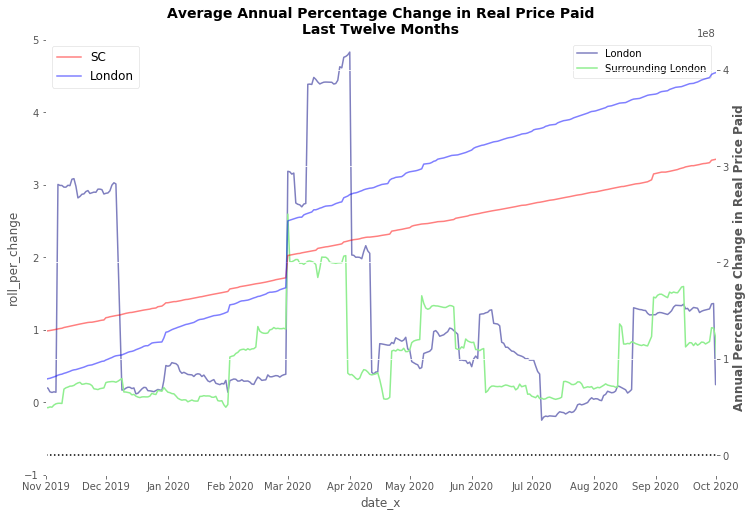

In [604]:
fig, ax = plt.subplots(figsize=(12, 8))
dat = last_year.yr_month

ax1 = sns.lineplot(data=last_yr_lon_every_day_rolling, x="date_x", y="roll_per_change", 
                  color= 'navy', alpha =0.5, label = 'London')
sns.lineplot(data=last_yr_sc_every_day_rolling, x="date_x", y="roll_per_change", 
             color= 'lightgreen', label = 'Surrounding London')

ax2 = ax1.twinx()
ax2 = sns.lineplot(data=last_yr_sc_every_day_rolling, x="date_x", y="cum_sum", 
                  color= 'red', alpha =0.5, label = 'SC')
sns.lineplot(data=last_yr_lon_every_day_rolling, x="date_x", y="cum_sum", 
                  color= 'blue', alpha =0.5, label = 'London')

plt.xlim(min(dat), max(dat))

date_form = DateFormatter("%b %Y")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 1))
plt.hlines(0, min(dat), max(dat), linestyle="dotted", color = 'black')

ax1.set_ylim(-1, 5)
plt.xticks(rotation = 45)
plt.title('Average Annual Percentage Change in Real Price Paid\nLast Twelve Months', fontsize = 14, fontweight = 'bold')
plt.ylabel('Annual Percentage Change in Real Price Paid', fontsize = 12, fontweight = 'bold')
plt.xlabel('Date', fontsize = 12, fontweight = 'bold')
plt.legend(fontsize = 'large')
plt.grid('off')
plt.show()

# Looking at null values in House Price Dataframe:

In [10]:
house_purchases['price'].mean()

199101.1903886728

In [11]:
house_purchases.isnull().sum()

transaction_id                0
price                         0
date                          0
postcode                  39900
property_type                 0
new_build                     0
lease_duration                0
house_name_num             4204
secondary_name         22494993
street                   393122
locality                8346578
town_city                     0
district                      0
county                        0
price_paid_category           0
record_status                 0
dtype: int64

- Note: There are 39,900 null values for postcodes, this will be dealt with below:

# Loading UK Postcode Data:

In [95]:
uk_postcodes = pd.read_csv('Data/ukpostcodes.csv')

In [96]:
uk_postcodes.head()

,id,postcode,latitude,longitude
0,1,AB10 1XG,57.144165,-2.114848
1,2,AB10 6RN,57.137880,-2.121487
2,3,AB10 7JB,57.124274,-2.127190
3,4,AB11 5QN,57.142701,-2.093295
4,5,AB11 6UL,57.137547,-2.112233


# Merging House Purchases Data with Postcode Data:

In [97]:
merged_df = pd.merge(house_purchases, uk_postcodes, on='postcode', how='inner')

In [98]:
merged_df.head()

,transaction_id,price,date,postcode,property_type,new_build,lease_duration,house_name_num,secondary_name,street,...,town_city,district,county,price_paid_category,record_status,yr_month,yr_week,id,latitude,longitude
0,{A42E2F04-2538-4A25-94C5-49E29C6C8FA8},18500,1995-01-31,TQ1 1RY,F,N,L,VILLA PARADISO,FLAT 10,HIGHER WARBERRY ROAD,...,TORQUAY,TORBAY,TORBAY,A,A,1995-01-05,1995-05,176091,50.467883,-3.519512
1,{08A8FE57-2C42-40DE-9C33-E8D7D8A9CEBB},18000,1995-09-07,TQ1 1RY,F,N,L,VILLA PARADISO,FLAT 4,HIGHER WARBERRY ROAD,...,TORQUAY,TORBAY,TORBAY,A,A,1995-09-36,1995-36,176091,50.467883,-3.519512
2,{10BE69F8-64A5-4FD7-A172-B4448FBC44EB},19000,1995-04-28,TQ1 1RY,F,N,L,VILLA PARADISO,FLAT 3,HIGHER WARBERRY ROAD,...,TORQUAY,TORBAY,TORBAY,A,A,1995-04-17,1995-17,176091,50.467883,-3.519512
3,{2A289EA0-040F-CDC8-E050-A8C063054829},300000,1995-01-09,TQ1 1RY,F,N,F,ROSA PINES LTD,NaN,HIGHER WARBERRY ROAD,...,TORQUAY,TORBAY,TORBAY,A,A,1995-01-02,1995-02,176091,50.467883,-3.519512
4,{01178325-E934-4283-A908-06DBE03D1E16},28500,1995-11-30,TQ1 1RY,F,N,L,VILLA PARADISO,FLAT 3,HIGHER WARBERRY ROAD,...,TORQUAY,TORBAY,TORBAY,A,A,1995-11-48,1995-48,176091,50.467883,-3.519512


In [99]:
merged_df.shape

(25509959, 21)

## Seeing how many values are omitted by merging in this manner:

In [100]:
omitted_values = len(house_purchases.price) - len(merged_df.price)

In [101]:
omitted_values

88332

In [102]:
percentage_omitted = omitted_values/len(house_purchases.price)

In [103]:
print("Percentage of Data Omitted: "+"{:.2%}".format(percentage_omitted))

Percentage of Data Omitted: 0.35%


## Examining if there's any pattern to these omitted values:

In [104]:
# Performing a left join instead to retain the values returning NaN in the latitude and logitude columns

alt_df = pd.merge(house_purchases, uk_postcodes, on='postcode', how='left')

In [105]:
alt_df.head()

,transaction_id,price,date,postcode,property_type,new_build,lease_duration,house_name_num,secondary_name,street,...,town_city,district,county,price_paid_category,record_status,yr_month,yr_week,id,latitude,longitude
0,{A42E2F04-2538-4A25-94C5-49E29C6C8FA8},18500,1995-01-31,TQ1 1RY,F,N,L,VILLA PARADISO,FLAT 10,HIGHER WARBERRY ROAD,...,TORQUAY,TORBAY,TORBAY,A,A,1995-01-05,1995-05,176091.0,50.467883,-3.519512
1,{1BA349E3-2579-40D6-999E-49E2A25D2284},73450,1995-10-09,L26 7XJ,D,Y,F,6,NaN,CATKIN ROAD,...,LIVERPOOL,KNOWSLEY,MERSEYSIDE,A,A,1995-10-41,1995-41,950129.0,53.373990,-2.845094
2,{E5B50DCB-BC7A-4E54-B167-49E2A6B4148B},59000,1995-03-31,BH12 2AE,D,N,F,28,NaN,ALDER ROAD,...,POOLE,POOLE,POOLE,A,A,1995-03-13,1995-13,1607251.0,50.730758,-1.922798
3,{81E50116-D675-4B7F-9F8D-49E2B5D43271},31000,1995-12-04,IP13 0DR,D,Y,F,NONSUCH COTTAGE,NaN,THE STREET,...,WOODBRIDGE,SUFFOLK COASTAL,SUFFOLK,A,A,1995-12-49,1995-49,1021542.0,52.181265,1.376901
4,{B97455B9-75CB-40BB-A615-42C53683E143},95000,1995-09-22,WS14 0BE,D,N,F,FOX COVER COTTAGE,NaN,HALL LANE,...,LICHFIELD,LICHFIELD,STAFFORDSHIRE,A,A,1995-09-38,1995-38,35564.0,52.657318,-1.883314


In [106]:
alt_df.shape

(25598291, 21)

In [107]:
om_values = len(house_purchases.price) - len(alt_df.price)

In [108]:
# Confirming no values omitted from the origianl dataframe using this sort of join:

om_values

0

### Creating a dataframe with only the values omitted on my initial inner join:

In [109]:
alt_df['omitted'] = alt_df.latitude.isnull()

In [ ]:
omitted_df = alt_df[alt_df['omitted']== True]

- Some of these omitted values represented the null values (39,900) found initially above.
- However, some have postcodes associated with them, below I have filtered out just those with postcodes:

In [111]:
ommitted_w_codes = omitted_df[omitted_df['postcode'].notnull()]
ommitted_w_codes.head()

,transaction_id,price,date,postcode,property_type,new_build,lease_duration,house_name_num,secondary_name,street,...,district,county,price_paid_category,record_status,yr_month,yr_week,id,latitude,longitude,omitted
1502,{FB53E39D-856F-4FF3-93F2-8E6B153FFFD6},21995,1995-05-25,WF9 4QU,T,N,F,49,NaN,TOP STREET,...,WAKEFIELD,WEST YORKSHIRE,A,A,1995-05-21,1995-21,NaN,NaN,NaN,True
1659,{D312A7B0-53E2-4FF3-A7D8-49ED4CBCAD20},38000,1995-11-21,TS18 3PB,T,N,F,1A,NaN,NaN,...,STOCKTON-ON-TEES,STOCKTON-ON-TEES,A,A,1995-11-47,1995-47,NaN,NaN,NaN,True
1830,{D838EE02-192D-4443-8885-F2F67BABE908},25000,1995-09-28,M11 4SU,T,N,F,4,NaN,RUSHEN STREET,...,MANCHESTER,GREATER MANCHESTER,A,A,1995-09-39,1995-39,NaN,NaN,NaN,True
2436,{6620FE24-2697-4EE2-84A7-49F04E20ED82},19950,1995-11-03,NG19 6BL,T,N,F,76,NaN,BOULD STREET,...,MANSFIELD,NOTTINGHAMSHIRE,A,A,1995-11-44,1995-44,NaN,NaN,NaN,True
2738,{C43470FD-07C2-45F7-B7FB-3F40697747DA},55000,1995-09-06,GU21 5JA,S,N,F,54,NaN,MAYBURY ROAD,...,WOKING,SURREY,A,A,1995-09-36,1995-36,NaN,NaN,NaN,True


## Loading dataframe of terminated postcodes:

- After searching for some of these postcodes on Google, they kept coming up as 'terminated', so I have downloaded an additional dataset of terminated postcodes below:

In [112]:
terminated_postcodes = pd.read_csv('Data/terminated_pcs.csv')

C:\Users\rozhouse\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (7,17,18,21,22,25,29,32,47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [113]:
terminated_postcodes.head()

,Postcode,In Use?,Latitude,Longitude,Easting,Northing,Grid Ref,County,District,Ward,...,Nearest station,Distance to station,Postcode area,Postcode district,Police force,Water company,Plus Code,Average Income,Sewage Company,Travel To Work Area
0,AB1 0AA,No,57.101474,-2.242851,385386.0,801193.0,NJ853011,NaN,Aberdeen City,Lower Deeside,...,Portlethen,8.31408,AB,AB1,Scotland,Scottish Water,9C9V4Q24+HV,NaN,NaN,Aberdeen
1,AB1 0AB,No,57.102554,-2.246308,385177.0,801314.0,NJ851013,NaN,Aberdeen City,Lower Deeside,...,Portlethen,8.55457,AB,AB1,Scotland,Scottish Water,9C9V4Q33+2F,NaN,NaN,Aberdeen
2,AB1 0AD,No,57.100556,-2.248342,385053.0,801092.0,NJ850010,NaN,Aberdeen City,Lower Deeside,...,Portlethen,8.54352,AB,AB1,Scotland,Scottish Water,9C9V4Q22+6M,NaN,NaN,Aberdeen
3,AB1 0AE,No,57.084444,-2.255708,384600.0,799300.0,NO845992,NaN,Aberdeenshire,North Kincardine,...,Portlethen,8.20809,AB,AB1,Scotland,Scottish Water,9C9V3PMV+QP,NaN,NaN,Aberdeen
4,AB1 0AF,No,57.096656,-2.258102,384460.0,800660.0,NJ844006,NaN,Aberdeen City,Lower Deeside,...,Portlethen,8.85583,AB,AB1,Scotland,Scottish Water,9C9V3PWR+MQ,NaN,NaN,Aberdeen


- Checking to see if one of the omitted postcodes is in the list of terminated postcodes:

In [114]:
terminated_postcodes[terminated_postcodes['Postcode']=='M11 4SU']

,Postcode,In Use?,Latitude,Longitude,Easting,Northing,Grid Ref,County,District,Ward,...,Nearest station,Distance to station,Postcode area,Postcode district,Police force,Water company,Plus Code,Average Income,Sewage Company,Travel To Work Area
430201,M11 4SU,No,53.481807,-2.180183,388140.0,398358.0,SJ881983,Greater Manchester,Manchester,Clayton & Openshaw,...,Ashburys,1.47139,M,M11,Greater Manchester,United Utilities,9C5VFRJ9+PW,31500.0,NaN,Manchester


- Converting the terminated postcodes df to only the data I need to join to my inital postcodes dataframe:

In [115]:
abrv_term_pcs = terminated_postcodes[['Postcode', 'Latitude', 'Longitude']]

In [116]:
abrv_term_pcs = abrv_term_pcs.rename(columns={'Postcode': 'postcode', 'Longitude': 'longitude', 'Latitude': 'latitude'})
abrv_term_pcs.head()

,postcode,latitude,longitude
0,AB1 0AA,57.101474,-2.242851
1,AB1 0AB,57.102554,-2.246308
2,AB1 0AD,57.100556,-2.248342
3,AB1 0AE,57.084444,-2.255708
4,AB1 0AF,57.096656,-2.258102


## Joining the terminated and current postcodes into one dataframe:

In [117]:
all_postcodes_df = pd.concat([uk_postcodes, abrv_term_pcs], ignore_index=True, sort=True)

In [118]:
all_postcodes_df.head()

,id,latitude,longitude,postcode
0,1.0,57.144165,-2.114848,AB10 1XG
1,2.0,57.137880,-2.121487,AB10 6RN
2,3.0,57.124274,-2.127190,AB10 7JB
3,4.0,57.142701,-2.093295,AB11 5QN
4,5.0,57.137547,-2.112233,AB11 6UL


In [119]:
all_postcodes_df.shape

(2644133, 4)

In [120]:
all_postcodes_df.isnull().sum()

id           876258
latitude         82
longitude        82
postcode          0
dtype: int64

In [121]:
# Removing the 82 postcodes without associated longitude and latitude information:
all_postcodes_df = all_postcodes_df[all_postcodes_df['latitude'].notnull()]

In [122]:
all_postcodes_df.isnull().sum()

id           876258
latitude          0
longitude         0
postcode          0
dtype: int64

## Merging the Initial House Purchases DF with the Complete Postcodes DF:

In [123]:
house_prices_w_long_lat = pd.merge(house_purchases, all_postcodes_df, on='postcode', how='inner')

In [329]:
house_prices_w_long_lat.isnull().sum()

transaction_id                0
price                         0
date                          0
postcode                      0
property_type                 0
new_build                     0
lease_duration                0
house_name_num             4201
secondary_name         22581578
street                   388623
locality                8409018
town_city                     0
district                      0
county                        0
price_paid_category           0
record_status                 0
yr_month                      0
id                        44885
latitude                      0
longitude                     0
dtype: int64

In [28]:
house_prices_w_long_lat.head()

,transaction_id,price,date,postcode,property_type,new_build,lease_duration,house_name_num,secondary_name,street,locality,town_city,district,county,price_paid_category,record_status,id,latitude,longitude
0,{A42E2F04-2538-4A25-94C5-49E29C6C8FA8},18500,1995-01-31,TQ1 1RY,F,N,L,VILLA PARADISO,FLAT 10,HIGHER WARBERRY ROAD,TORQUAY,TORQUAY,TORBAY,TORBAY,A,A,176091.0,50.467883,-3.519512
1,{08A8FE57-2C42-40DE-9C33-E8D7D8A9CEBB},18000,1995-09-07,TQ1 1RY,F,N,L,VILLA PARADISO,FLAT 4,HIGHER WARBERRY ROAD,TORQUAY,TORQUAY,TORBAY,TORBAY,A,A,176091.0,50.467883,-3.519512
2,{10BE69F8-64A5-4FD7-A172-B4448FBC44EB},19000,1995-04-28,TQ1 1RY,F,N,L,VILLA PARADISO,FLAT 3,HIGHER WARBERRY ROAD,TORQUAY,TORQUAY,TORBAY,TORBAY,A,A,176091.0,50.467883,-3.519512
3,{2A289EA0-040F-CDC8-E050-A8C063054829},300000,1995-01-09,TQ1 1RY,F,N,F,ROSA PINES LTD,NaN,HIGHER WARBERRY ROAD,NaN,TORQUAY,TORBAY,TORBAY,A,A,176091.0,50.467883,-3.519512
4,{01178325-E934-4283-A908-06DBE03D1E16},28500,1995-11-30,TQ1 1RY,F,N,L,VILLA PARADISO,FLAT 3,HIGHER WARBERRY ROAD,TORQUAY,TORQUAY,TORBAY,TORBAY,A,A,176091.0,50.467883,-3.519512


I do not plan to use house name/number, secondary name, street, or locality data as my analysis will not go to that level of granularity, so I am comfortable leaving these as null values for now.

In [124]:
final_omitted_values = len(house_purchases.price) - len(house_prices_w_long_lat.price)
final_omitted_values

43447

- The original dataset was missing 39,900 postcodes, so by combining the latitude and logitude data, we have only removed an extra (43,447 - 39,900) = 3,547 datapoints from our dataset.

In [125]:
final_percentage_omitted = final_omitted_values/len(house_purchases.price)
print("Percentage of Data Omitted: "+"{:.2%}".format(final_percentage_omitted))

Percentage of Data Omitted: 0.17%



# SUMMARY:   

- By adding in the terminated postcodes we have cut the excluded data (i.e. without longitude and latitude information) down from 0.34% of the initial data to 0.17%.

# Altering some column entries to be more clear:

Source of info on dataset: https://www.gov.uk/guidance/about-the-price-paid-data#explanations-of-column-headers-in-the-ppd

In [126]:
# Altering Property Type Column:
house_prices_w_long_lat['property_type'] = house_prices_w_long_lat['property_type'].str.replace('F','Flat')
house_prices_w_long_lat['property_type'] = house_prices_w_long_lat['property_type'].str.replace('D','Detached')
house_prices_w_long_lat['property_type'] = house_prices_w_long_lat['property_type'].str.replace('S','Semi-Detached')
house_prices_w_long_lat['property_type'] = house_prices_w_long_lat['property_type'].str.replace('T','Terraced')
house_prices_w_long_lat['property_type'] = house_prices_w_long_lat['property_type'].str.replace('O','Other')

# ALtering old/new_build column:
house_prices_w_long_lat['new_build'] = house_prices_w_long_lat['new_build'].str.replace('N','Existing Build')
house_prices_w_long_lat['new_build'] = house_prices_w_long_lat['new_build'].str.replace('Y','New Build')

# Altering lease_duration column:
house_prices_w_long_lat['lease_duration'] = house_prices_w_long_lat['lease_duration'].str.replace('L','Leasehold')
house_prices_w_long_lat['lease_duration'] = house_prices_w_long_lat['lease_duration'].str.replace('F','Freehold')

In [ ]:
# Dropping 'U' from lease duration column (532 values), and 'Other' from Property Type 
# (as this contains a lot of commercial property which is outside the scope of this project):

house_prices_w_long_lat = house_prices_w_long_lat[house_prices_w_long_lat['lease_duration'] != 'U']
house_prices_w_long_lat = house_prices_w_long_lat[house_prices_w_long_lat['property_type'] != 'Other']

In [ ]:
house_prices_w_long_lat.head()

# Checking for Duplicated Entries:

In [36]:
duplicate_rows_df = house_prices_w_long_lat[house_prices_w_long_lat.duplicated()]
duplicate_rows_df

,transaction_id,price,date,postcode,property_type,new_build,lease_duration,house_name_num,secondary_name,street,locality,town_city,district,county,price_paid_category,record_status,id,latitude,longitude


- Seems to be no duplicated records.

# Saving Complete Cleaned DF:

In [38]:
# Saving resulting dataframe:

house_prices_w_long_lat.to_csv('Data/cleaned_house_price_data.csv')

# Creating a Year and Month Column:

In [335]:
house_prices_w_long_lat['year'] = pd.DatetimeIndex(house_prices_w_long_lat['date']).year

In [336]:
house_prices_w_long_lat['month'] = pd.DatetimeIndex(house_prices_w_long_lat['date']).month

In [337]:
house_prices_w_long_lat.head()

,transaction_id,price,date,postcode,property_type,new_build,lease_duration,house_name_num,secondary_name,street,...,district,county,price_paid_category,record_status,yr_month,id,latitude,longitude,year,month
0,{A42E2F04-2538-4A25-94C5-49E29C6C8FA8},18500,1995-01-31,TQ1 1RY,Flat,Existing Build,Leasehold,VILLA PARADISO,FLAT 10,HIGHER WARBERRY ROAD,...,TORBAY,TORBAY,A,A,1995-01-01,176091.0,50.467883,-3.519512,1995,1
1,{08A8FE57-2C42-40DE-9C33-E8D7D8A9CEBB},18000,1995-09-07,TQ1 1RY,Flat,Existing Build,Leasehold,VILLA PARADISO,FLAT 4,HIGHER WARBERRY ROAD,...,TORBAY,TORBAY,A,A,1995-09-01,176091.0,50.467883,-3.519512,1995,9
2,{10BE69F8-64A5-4FD7-A172-B4448FBC44EB},19000,1995-04-28,TQ1 1RY,Flat,Existing Build,Leasehold,VILLA PARADISO,FLAT 3,HIGHER WARBERRY ROAD,...,TORBAY,TORBAY,A,A,1995-04-01,176091.0,50.467883,-3.519512,1995,4
3,{2A289EA0-040F-CDC8-E050-A8C063054829},300000,1995-01-09,TQ1 1RY,Flat,Existing Build,Freehold,ROSA PINES LTD,NaN,HIGHER WARBERRY ROAD,...,TORBAY,TORBAY,A,A,1995-01-01,176091.0,50.467883,-3.519512,1995,1
4,{01178325-E934-4283-A908-06DBE03D1E16},28500,1995-11-30,TQ1 1RY,Flat,Existing Build,Leasehold,VILLA PARADISO,FLAT 3,HIGHER WARBERRY ROAD,...,TORBAY,TORBAY,A,A,1995-11-01,176091.0,50.467883,-3.519512,1995,11


# Saving Smaller DF to work with:

## Last 10 Years Data - only essential Columns:

In [338]:
last_10_yrs = house_prices_w_long_lat[house_prices_w_long_lat['year']>= 2011]

In [339]:
last_10_yrs.drop(['transaction_id', 'street', 'locality', 
                  'price_paid_category', 'record_status', 'id'], axis=1, inplace=True)

C:\Users\rozhouse\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [340]:
last_10_yrs.head()

,price,date,postcode,property_type,new_build,lease_duration,house_name_num,secondary_name,town_city,district,county,yr_month,latitude,longitude,year,month
47,200000,2011-10-14,TQ1 1RY,Semi-Detached,Existing Build,Freehold,LYNWOOD,NaN,TORQUAY,TORBAY,TORBAY,2011-10-01,50.467883,-3.519512,2011,10
48,105000,2012-05-11,TQ1 1RY,Flat,Existing Build,Leasehold,VILLA PARADISO,FLAT 16,TORQUAY,TORBAY,TORBAY,2012-05-01,50.467883,-3.519512,2012,5
49,87500,2012-08-15,TQ1 1RY,Flat,Existing Build,Leasehold,VILLA PARADISO,FLAT 2,TORQUAY,TORBAY,TORBAY,2012-08-01,50.467883,-3.519512,2012,8
50,450000,2012-07-20,TQ1 1RY,Semi-Detached,Existing Build,Freehold,SILVERDALE,NaN,TORQUAY,TORBAY,TORBAY,2012-07-01,50.467883,-3.519512,2012,7
51,104000,2013-10-23,TQ1 1RY,Flat,Existing Build,Leasehold,VILLA PARADISO,FLAT 9,TORQUAY,TORBAY,TORBAY,2013-10-01,50.467883,-3.519512,2013,10


In [341]:
# Saving resulting dataframe:

last_10_yrs.to_csv('Data/last_10_yrs_hps.csv')